# Banknote dimensions

Which banknotes exhibit the greatest size differences between denominations? Which are the largest overall?

Banknote dimensions differ widely across countries.

The size of a banknote impacts its practicality. Uniform dimensions enhance durability by ensuring a snug wallet fit, while also enabling vending machines and ATMs to process them seamlessly. Conversely, varied sizes assist the visually impaired in distinguishing denominations, though smaller notes can pose challenges for machine sorting and counting.

Striking a balance between these considerations is essential in currency design.

The file `banknote-dimensions.csv` shows the `length` and `width` in millimeters for 42 currencies. This dataset spans all 22 subregions and sub-subregions of the world, as defined by the United Nations Statistics Division's geoscheme.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('banknote-dimensions.csv')
df

,currency,code,value,length,width
0,Argentine Peso,ARS,2,155.0,65.0
1,Argentine Peso,ARS,5,155.0,65.0
2,Argentine Peso,ARS,10,155.0,65.0
3,Argentine Peso,ARS,20,155.0,65.0
4,Argentine Peso,ARS,50,155.0,65.0
...,...,...,...,...,...
245,West African Franc,XOF,500,114.0,60.0
246,West African Franc,XOF,1000,125.0,66.0
247,West African Franc,XOF,2000,130.0,65.0
248,West African Franc,XOF,5000,140.0,74.0


In [2]:
# longest and shortest banknotes for each currency
# modify the code below if you are more interested in width
length = df.groupby('currency').agg(max=('length', 'max'), min=('length', 'min')).reset_index()
length['diff'] = length['max'] - length['min']
length.head()

,currency,max,min,diff
0,Argentine Peso,155.0,155.0,0.0
1,Australian Dollar,158.0,130.0,28.0
2,Bangladeshi Taka,155.0,100.0,55.0
3,Bolivian Boliviano,140.0,140.0,0.0
4,Canadian Dollar,152.4,152.4,0.0


In [3]:
# helper function, change gap, vertical alignment, horizontal alignment, placement of gap...
def add_labels(df, x_col, y_col, label_col):
	for i, row in df.iterrows():
		x = row[x_col]
		y = row[y_col]
		gap = "  "
		label = gap + row[label_col]
		plt.text(x, y, label, va='bottom', ha='left', fontsize=6)


- Generate paired scatter plots to compare the `length` of the longest and shortest banknotes for each currency.

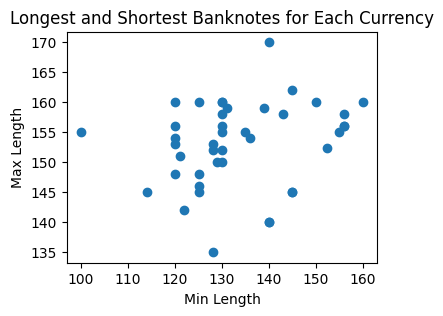

In [4]:
plt.figure(figsize=(4, 3))  
plt.scatter(length['min'], length['max'])
plt.xlabel('Min Length')
plt.ylabel('Max Length')
plt.title('Longest and Shortest Banknotes for Each Currency')
plt.show()

- Create similar paired scatter plots, but for `width` instead of `length`.

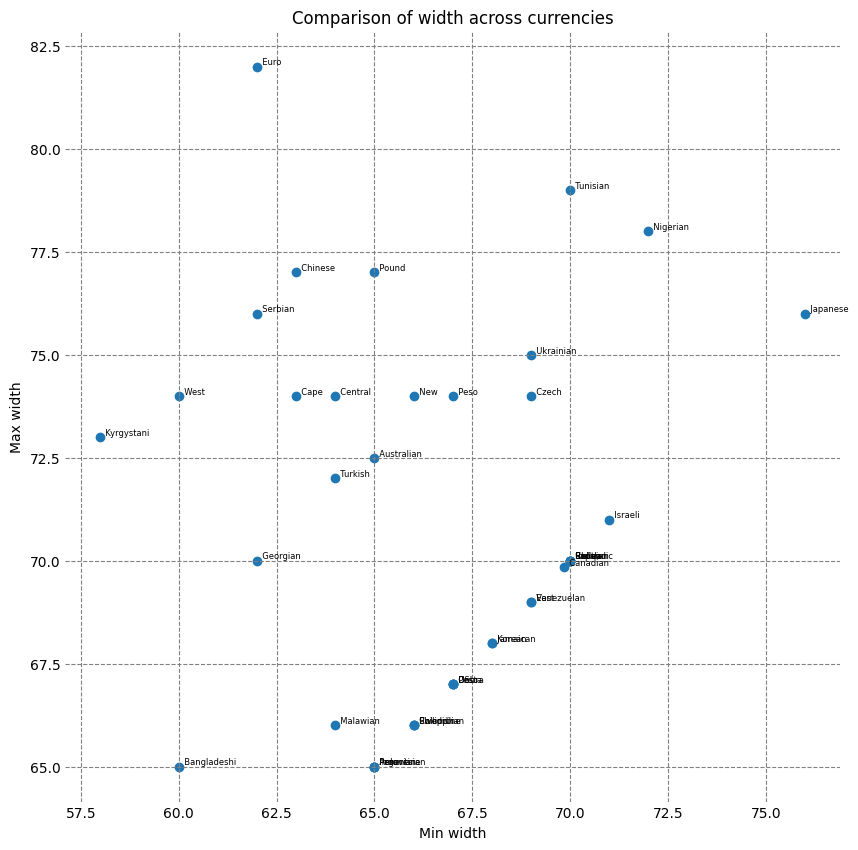

In [5]:
# Create the dataframe
width = df.groupby('currency').agg(max=('width', 'max'), min=('width', 'min')).reset_index()

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(width['min'], width['max'])
plt.xlabel('Min width')
plt.ylabel('Max width')
plt.title('Comparison of width across currencies')
plt.grid(axis="both", linestyle="--", color='grey')
ax = plt.gca()
ax.tick_params(axis='both', length=0)
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

labels = width['currency'].str.split(' ').str[0] # Keep only the first characters of the currency, for labels
width['labels'] = labels

# Add labels 
add_labels(width, 'min', 'max', 'labels')

In [ ]:
total_entries_length = length.shape[0]
consistent_length = length.query('diff == 0').shape[0]
consistency_length_percentage = consistent_length / total_entries_length * 100
print(f'Percentage of consistency for length : {round(consistency_length_percentage, 2)} %.')

# Same, for width
width['diff'] = width['max'] - width['min']
total_entries_width = width.shape[0]
consistent_width = width.query('diff == 0').shape[0]
consistency_width_percentage = consistent_width / total_entries_width * 100
print(f'Percentage of consistency for width : {round(consistency_width_percentage, 2)} %.')

# Merge dataframes 
length_width = length.merge(width, on='currency', how='left', suffixes=('_length', '_width'))
vary = length_width.query('diff_length != 0 and diff_width != 0').shape[0]
variance_percentage = vary / total_entries_length * 100
print(f'The variance percentage combining length and width : {round(variance_percentage, 2)} %.')

Percentage of consistency for length : 21.43 %.
Percentage of consistency for width : 54.76 %.
The variance percentage combining length and width : 45.24 %.


,currency,code,value,length,width
